In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# Carregando e preparando os dados
file_path = './Datasets/Resultados.csv'
data = pd.read_csv(file_path, sep=';')
data['Value'] = data['Value'].str.replace(',', '.').astype(float)
data['Percentage'] = data['Percentage'].str.replace(',', '.').astype(float)

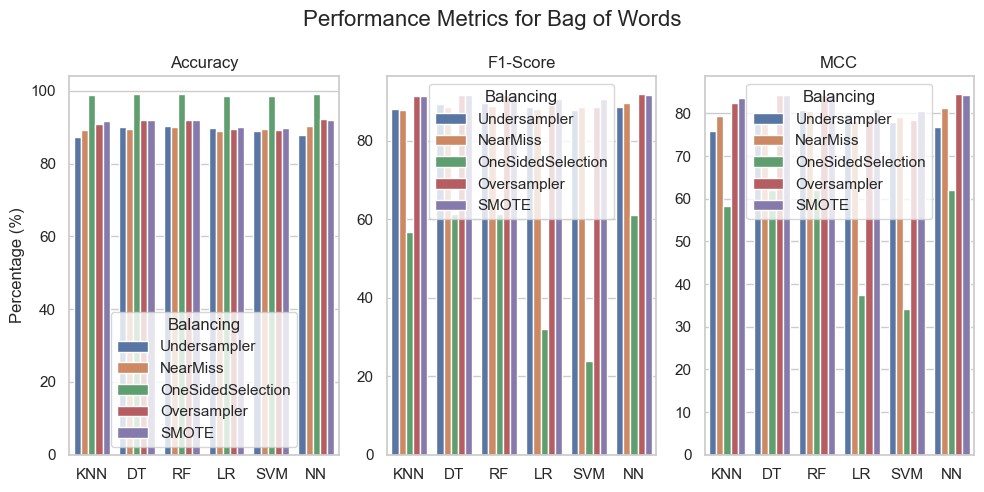

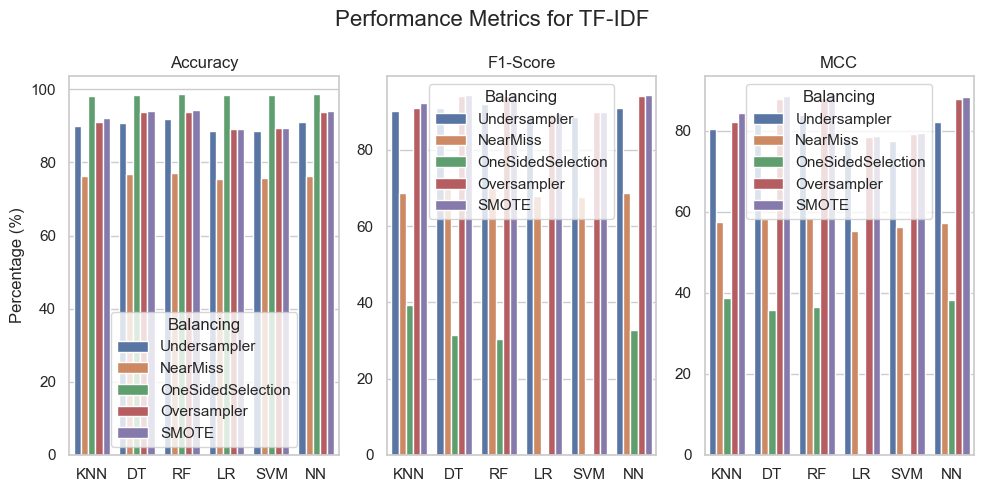

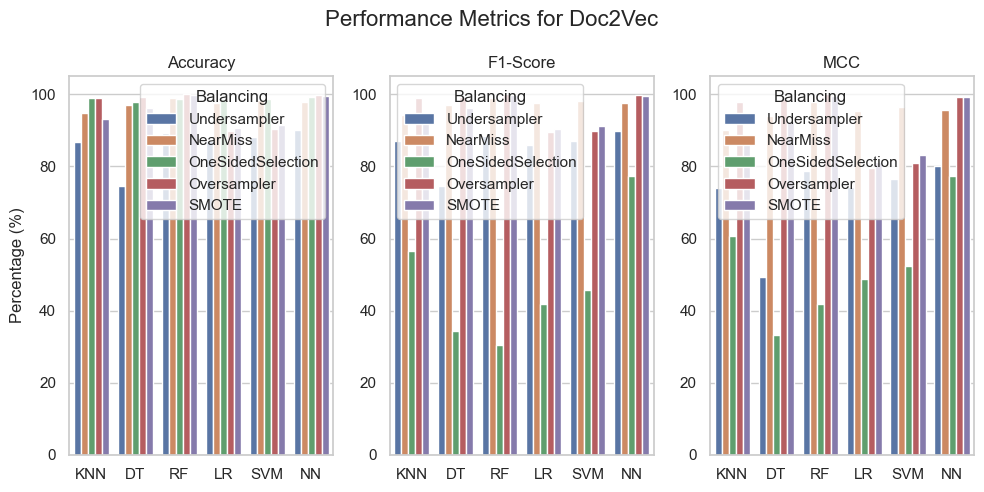

In [3]:
# Configurações para os gráficos
sns.set(style="whitegrid")

# Obtendo técnicas de NLP e métricas únicas
nlp_techniques = data['NLP'].unique()
metrics = data['Metric'].unique()

# Criando gráficos separados para cada técnica de NLP
for nlp in nlp_techniques:
    nlp_data = data[data['NLP'] == nlp]

    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Performance Metrics for {nlp}", fontsize=16)

    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        subset = nlp_data[nlp_data['Metric'] == metric]
        sns.barplot(x="ML", y="Percentage", hue="Balancing", data=subset)
        plt.title(metric)
        plt.ylabel('Percentage (%)' if i == 0 else '')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()


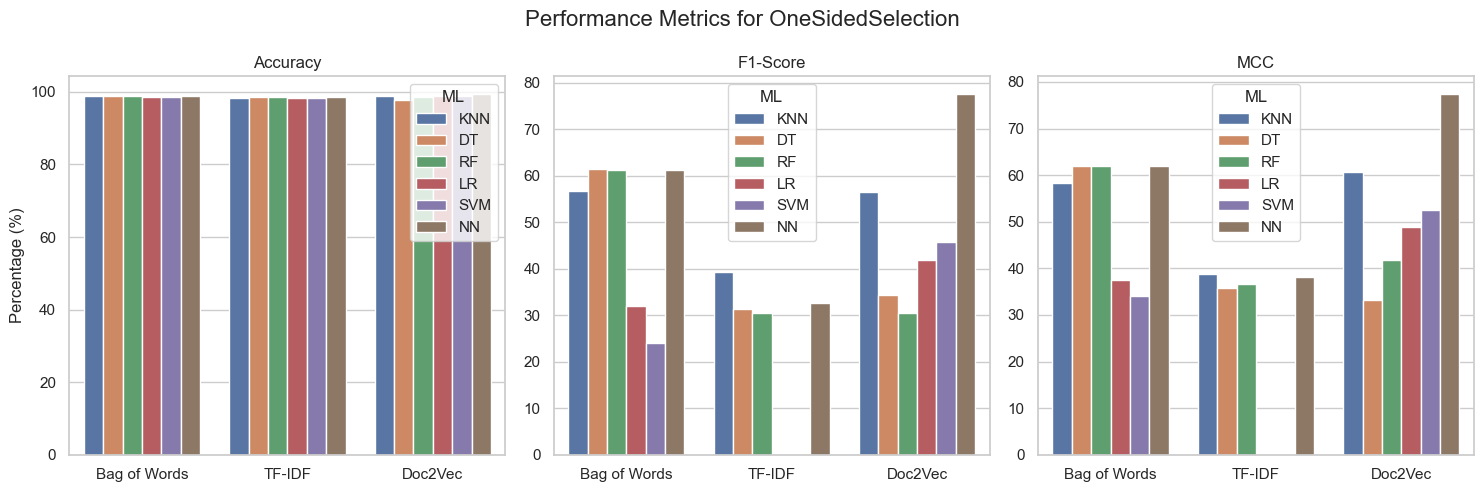

In [4]:
# Configurações para os gráficos
sns.set(style="whitegrid")

# Obtendo métricas únicas
metrics = data['Metric'].unique()

# Filtrando os dados para a técnica 'OneSidedSelection'
oss_data = data[data['Balancing'] == 'OneSidedSelection']

# Criando gráficos para 'OneSidedSelection'
plt.figure(figsize=(15, 5))
plt.suptitle("Performance Metrics for OneSidedSelection", fontsize=16)

for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    subset = oss_data[oss_data['Metric'] == metric]
    sns.barplot(x="NLP", y="Percentage", hue="ML", data=subset)
    plt.title(metric)
    plt.ylabel('Percentage (%)' if i == 0 else '')
    plt.xlabel('')

plt.tight_layout()
plt.show()


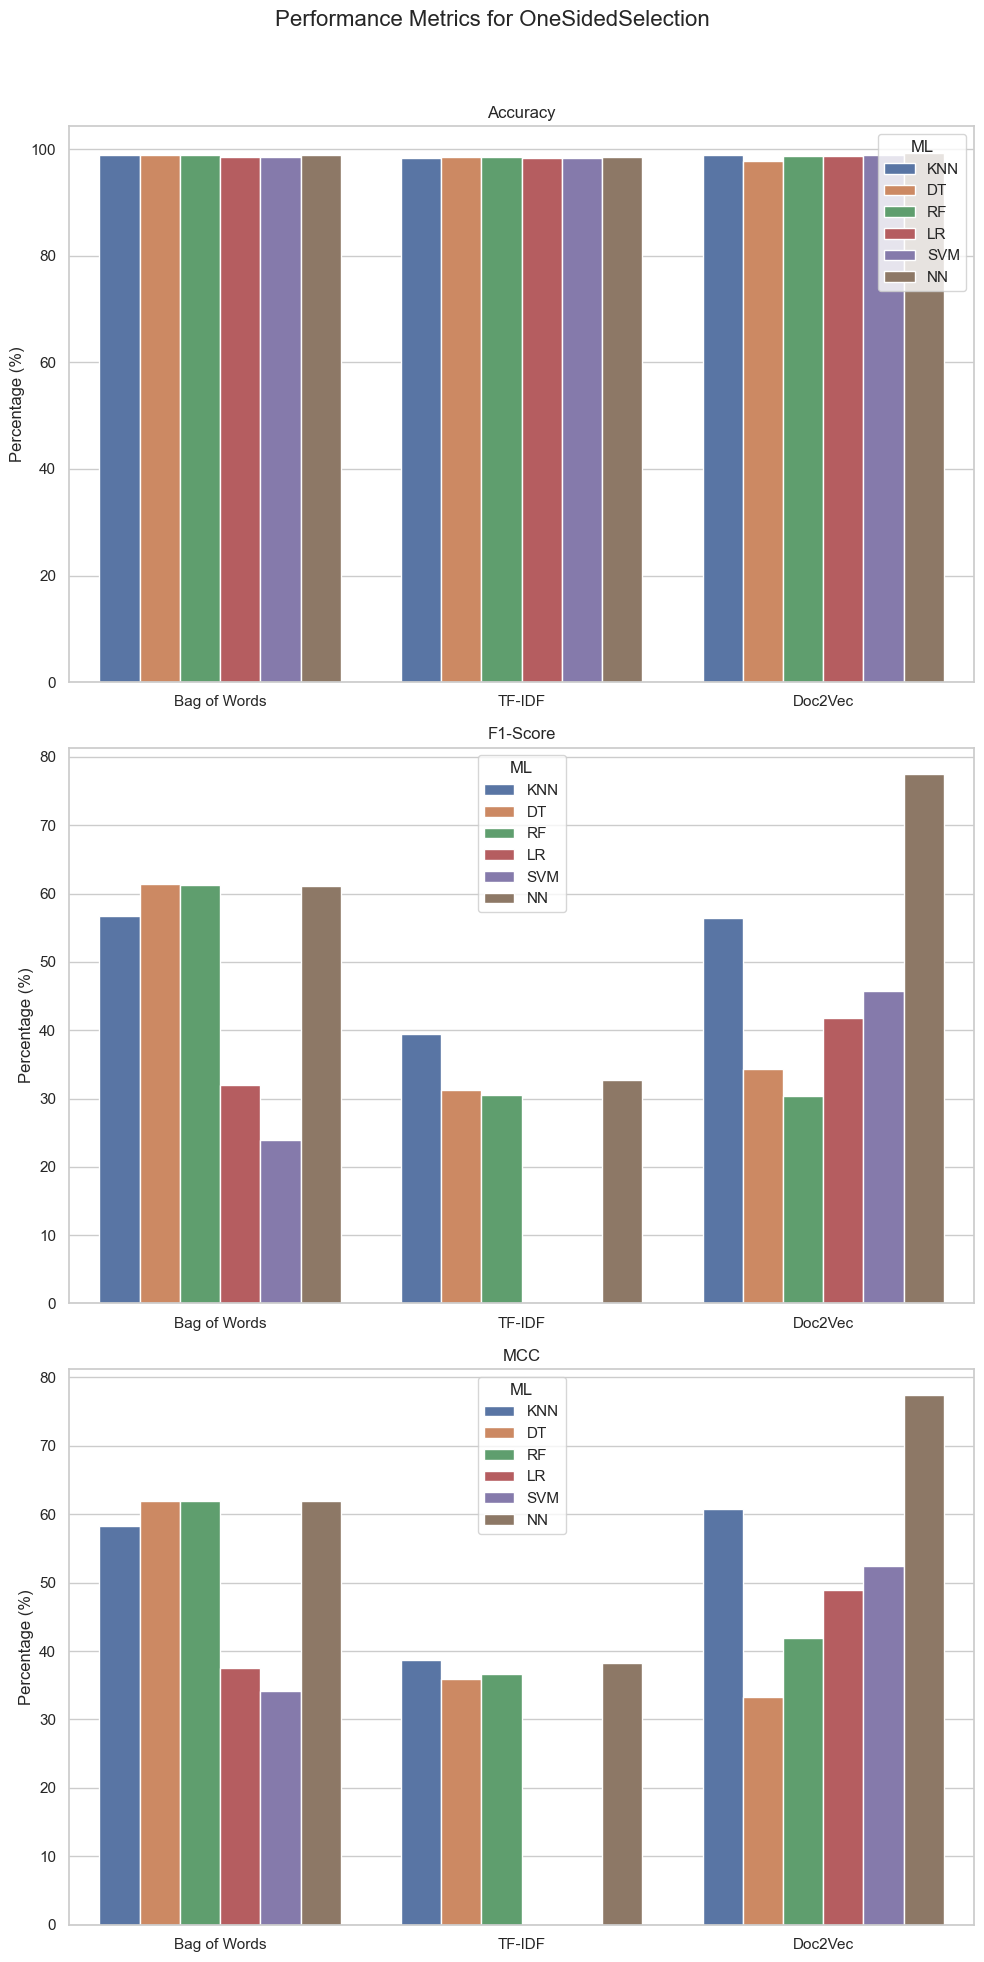

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring the seaborn style is set
sns.set(style="whitegrid")

# Filter the data for the 'OneSidedSelection' balancing technique
oss_data = data[data['Balancing'] == 'OneSidedSelection']

# If no data is available for 'OneSidedSelection', handle gracefully
if not oss_data.empty:
    # Obtaining unique metrics
    metrics = oss_data['Metric'].unique()

    # Creating the plot
    plt.figure(figsize=(10, 20))  # Adjusting the figure size for vertical layout
    plt.suptitle("Performance Metrics for OneSidedSelection", fontsize=16)

    for i, metric in enumerate(metrics):
        plt.subplot(len(metrics), 1, i+1)
        subset = oss_data[oss_data['Metric'] == metric]
        sns.barplot(x="NLP", y="Percentage", hue="ML", data=subset)
        plt.title(metric)
        plt.ylabel('Percentage (%)')
        plt.xlabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("No data available for the 'OneSidedSelection' balancing technique.")


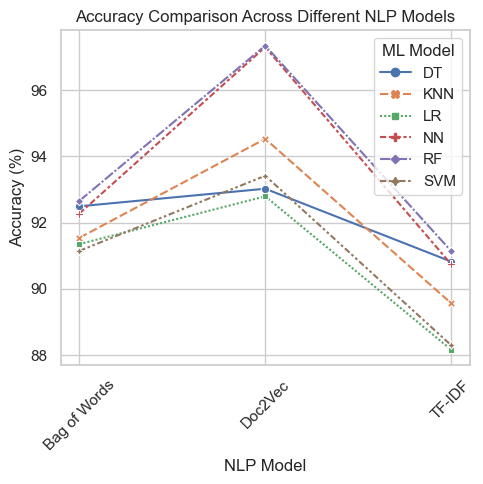

In [ ]:
# Filtrando os dados para analisar apenas a métrica 'Accuracy'
accuracy_data = data[data['Metric'] == 'Accuracy']

# Agregando os dados para evitar duplicatas no pivot
accuracy_agg_data = accuracy_data.groupby(['NLP', 'ML']).agg({'Percentage': 'mean'}).reset_index()

# Reorganizando os dados para um formato adequado para um gráfico de linhas
accuracy_line_data = accuracy_agg_data.pivot(index='NLP', columns='ML', values='Percentage')

# Configurações para os gráficos
sns.set(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(5, 5))
plt.title("Accuracy Comparison Across Different NLP Models", fontsize=12)
sns.lineplot(data=accuracy_line_data, markers=True)
plt.ylabel('Accuracy (%)')
plt.xlabel('NLP Model')
plt.xticks(rotation=45)
plt.legend(title='ML Model', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


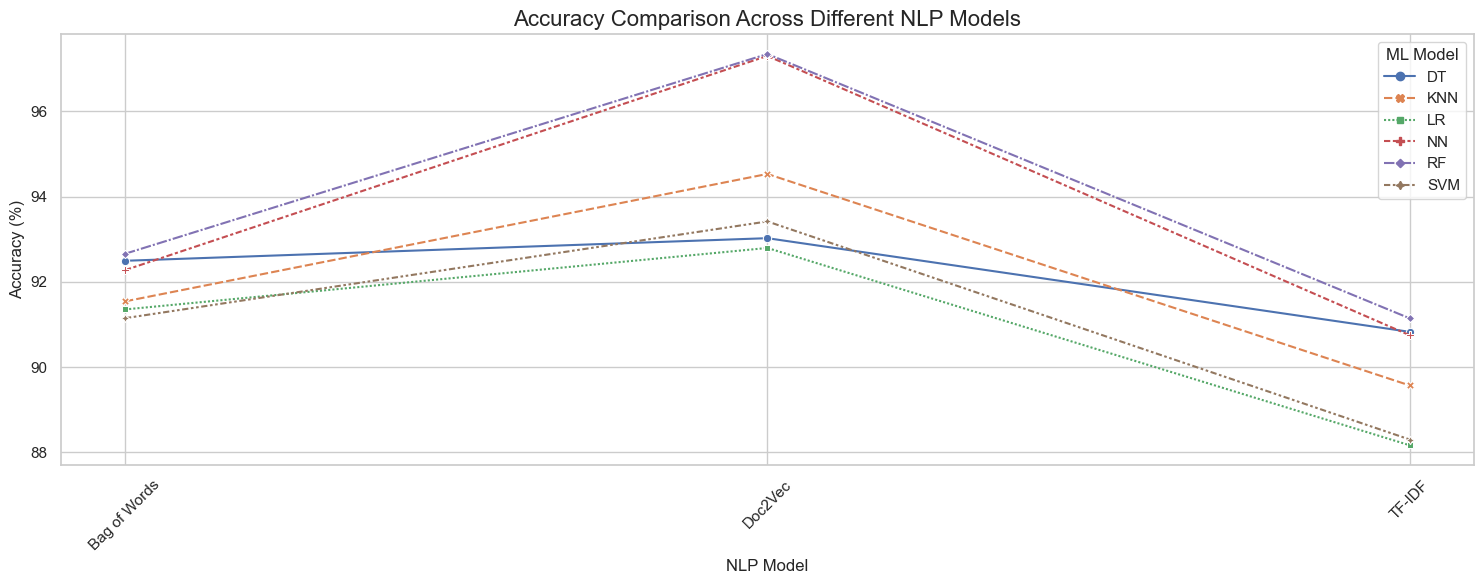

In [ ]:
# Filtrando os dados para analisar apenas a métrica 'Accuracy'
accuracy_data = data[data['Metric'] == 'Accuracy']

# Utilizando pivot_table para evitar o problema de duplicatas
accuracy_pivot_data = accuracy_data.pivot_table(index='NLP', columns='ML', values='Percentage', aggfunc='mean')

# Configurações para os gráficos
sns.set(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(15, 6))
plt.title("Accuracy Comparison Across Different NLP Models", fontsize=16)
sns.lineplot(data=accuracy_pivot_data, markers=True)
plt.ylabel('Accuracy (%)')
plt.xlabel('NLP Model')
plt.xticks(rotation=45)
plt.legend(title='ML Model', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


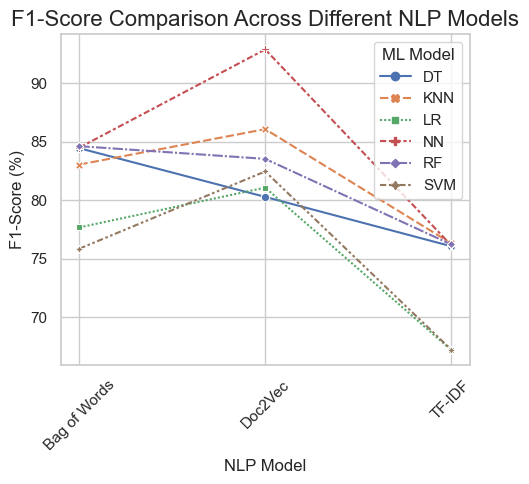

In [ ]:
# Filtrando os dados para analisar apenas a métrica 'F1-Score'
f1_score_data = data[data['Metric'] == 'F1-Score']

# Utilizando pivot_table para organizar os dados do F1-Score
f1_score_pivot_data = f1_score_data.pivot_table(index='NLP', columns='ML', values='Percentage', aggfunc='mean')

# Configurações para os gráficos
sns.set(style="whitegrid")

# Criando o gráfico de linhas para comparar o F1-Score entre diferentes modelos de NLP e ML
plt.figure(figsize=(5, 5))
plt.title("F1-Score Comparison Across Different NLP Models", fontsize=16)
sns.lineplot(data=f1_score_pivot_data, markers=True)
plt.ylabel('F1-Score (%)')
plt.xlabel('NLP Model')
plt.xticks(rotation=45)
plt.legend(title='ML Model', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

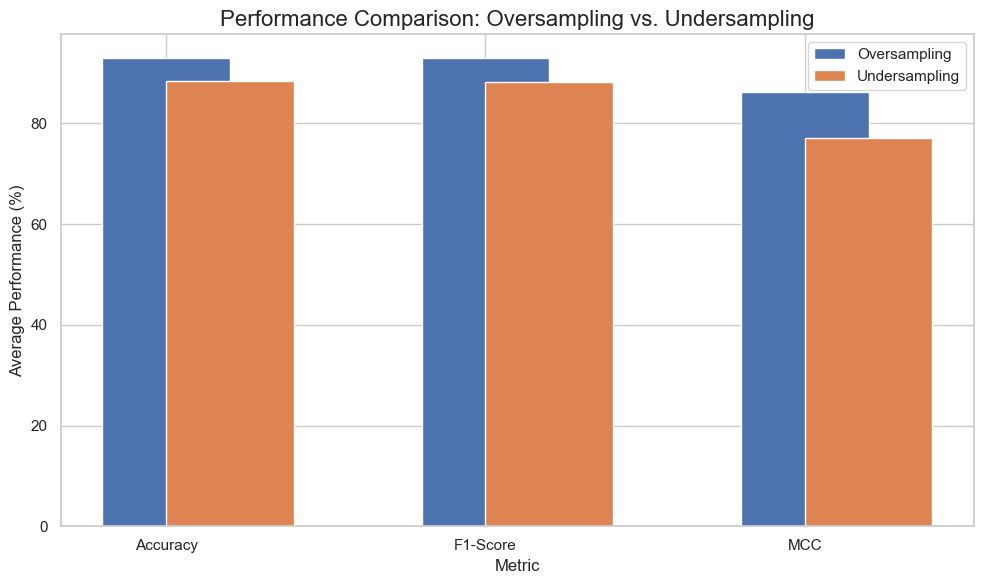

In [ ]:
# Filtrando os dados para comparar técnicas de oversampling e undersampling
oversampling_data = data[data['Balancing'] == 'Oversampler']
undersampling_data = data[data['Balancing'] == 'Undersampler']

# Agregando os dados
oversampling_agg_data = oversampling_data.groupby(['Metric']).agg({'Percentage': 'mean'}).reset_index()
undersampling_agg_data = undersampling_data.groupby(['Metric']).agg({'Percentage': 'mean'}).reset_index()

# Preparando os dados para o gráfico
combined_data = pd.merge(oversampling_agg_data, undersampling_agg_data, on='Metric', suffixes=('_Oversampling', '_Undersampling'))

# Criando o gráfico para comparar o desempenho de oversampling e undersampling
plt.figure(figsize=(10, 6))
plt.title("Performance Comparison: Oversampling vs. Undersampling", fontsize=16)
x = range(len(combined_data))
plt.bar(x, combined_data['Percentage_Oversampling'], width=0.4, label='Oversampling', align='center')
plt.bar(x, combined_data['Percentage_Undersampling'], width=0.4, label='Undersampling', align='edge')
plt.xticks(x, combined_data['Metric'])
plt.ylabel('Average Performance (%)')
plt.xlabel('Metric')
plt.legend()
plt.tight_layout()
plt.show()

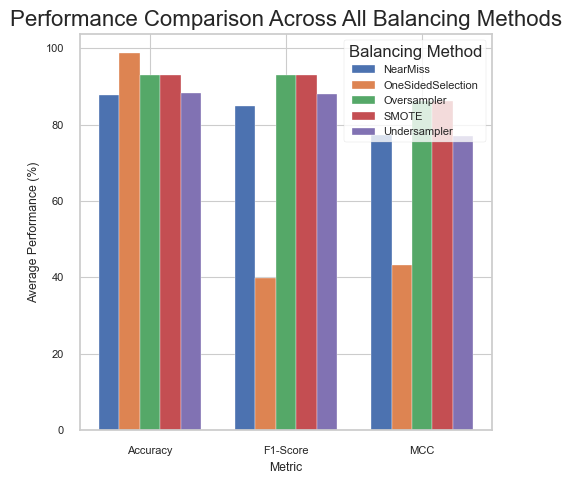

In [ ]:
# Agregando os dados por métrica e método de balanceamento
all_balancing_agg_data = data.groupby(['Metric', 'Balancing']).agg({'Percentage': 'mean'}).reset_index()

# Definindo o estilo do gráfico para fundo branco
plt.style.use('seaborn-v0_8-paper')

# Configurando o gráfico de barras agrupadas
plt.figure(figsize=(5, 5))
plt.title("Performance Comparison Across All Balancing Methods", fontsize=16)

# Obtendo a lista de métricas e métodos de balanceamento
metrics = all_balancing_agg_data['Metric'].unique()
balancing_methods = all_balancing_agg_data['Balancing'].unique()
num_metrics = len(metrics)
num_methods = len(balancing_methods)
bar_width = 0.15  # Largura das barras

# Criando as barras para cada método de balanceamento
for i, method in enumerate(balancing_methods):
    percentages = all_balancing_agg_data[all_balancing_agg_data['Balancing'] == method]['Percentage']
    positions = [p + bar_width * i for p in range(num_metrics)]
    plt.bar(positions, percentages, width=bar_width, label=method)

plt.xticks([r + bar_width * (num_methods - 1) / 2 for r in range(num_metrics)], metrics)
plt.ylabel('Average Performance (%)')
plt.xlabel('Metric')
plt.legend(title='Balancing Method')
plt.tight_layout()
plt.show()

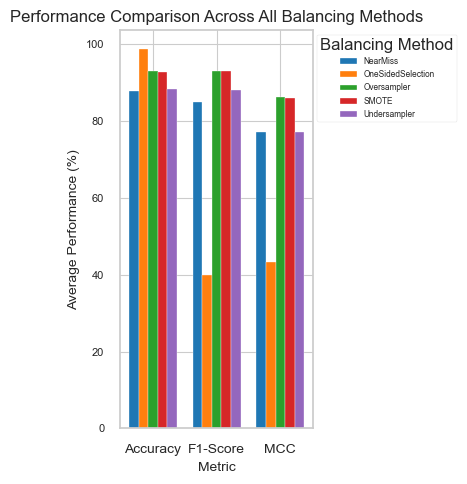

In [ ]:
# Agregando os dados por métrica e método de balanceamento
all_balancing_agg_data = data.groupby(['Metric', 'Balancing']).agg({'Percentage': 'mean'}).reset_index()

# Definindo o estilo do gráfico para fundo branco e escolhendo um esquema de cores
plt.style.use('seaborn-v0_8-paper')
sns.set_palette("tab10")  # Esquema de cores

# Configurando o gráfico de barras agrupadas
plt.figure(figsize=(5, 5))
plt.title("Performance Comparison Across All Balancing Methods", fontsize=12)

# Obtendo a lista de métricas e métodos de balanceamento
metrics = all_balancing_agg_data['Metric'].unique()
balancing_methods = all_balancing_agg_data['Balancing'].unique()
num_metrics = len(metrics)
num_methods = len(balancing_methods)
bar_width = 0.15  # Largura das barras

# Criando as barras para cada método de balanceamento
for i, method in enumerate(balancing_methods):
    percentages = all_balancing_agg_data[all_balancing_agg_data['Balancing'] == method]['Percentage']
    positions = [p + bar_width * i for p in range(num_metrics)]
    plt.bar(positions, percentages, width=bar_width, label=method)

plt.xticks([r + bar_width * (num_methods - 1) / 2 for r in range(num_metrics)], metrics, fontsize=10)
plt.ylabel('Average Performance (%)', fontsize=10)
plt.xlabel('Metric', fontsize=10)
plt.legend(title='Balancing Method', loc='upper left', bbox_to_anchor=(1, 1), fontsize=6)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustando o layout para acomodar a legenda fora do gráfico

plt.show()

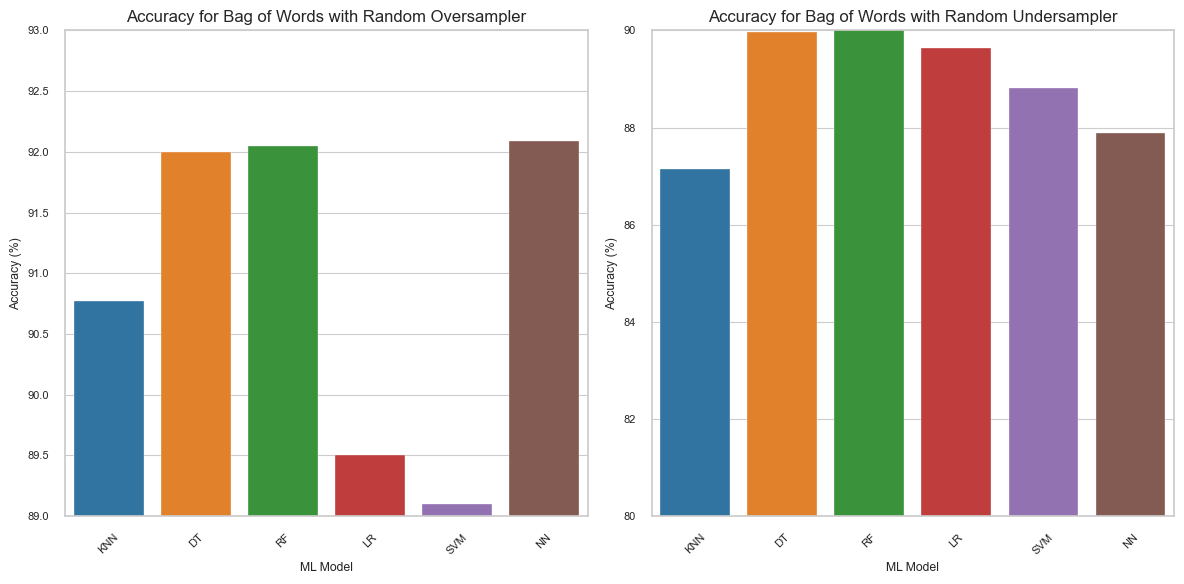

In [ ]:
# Filtrando dados para Bag of Words e métrica de precisão (Accuracy)
bow_data = data[(data['NLP'] == 'Bag of Words') & (data['Metric'] == 'Accuracy')]

# Separando dados para Random Oversampler e Random Undersampler
bow_oversampler_data = bow_data[bow_data['Balancing'] == 'Oversampler']
bow_undersampler_data = bow_data[bow_data['Balancing'] == 'Undersampler']

# Criando gráficos
plt.figure(figsize=(12, 6))

# Gráfico para Random Oversampler
plt.subplot(1, 2, 1)
plt.title("Accuracy for Bag of Words with Random Oversampler", fontsize=12)
sns.barplot(x="ML", y="Percentage", data=bow_oversampler_data)
plt.ylim(89, 93)
plt.ylabel('Accuracy (%)')
plt.xlabel('ML Model')
plt.xticks(rotation=45)

# Gráfico para Random Undersampler
plt.subplot(1, 2, 2)
plt.title("Accuracy for Bag of Words with Random Undersampler", fontsize=12)
sns.barplot(x="ML", y="Percentage", data=bow_undersampler_data)
plt.ylim(80, 90)
plt.ylabel('Accuracy (%)')
plt.xlabel('ML Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

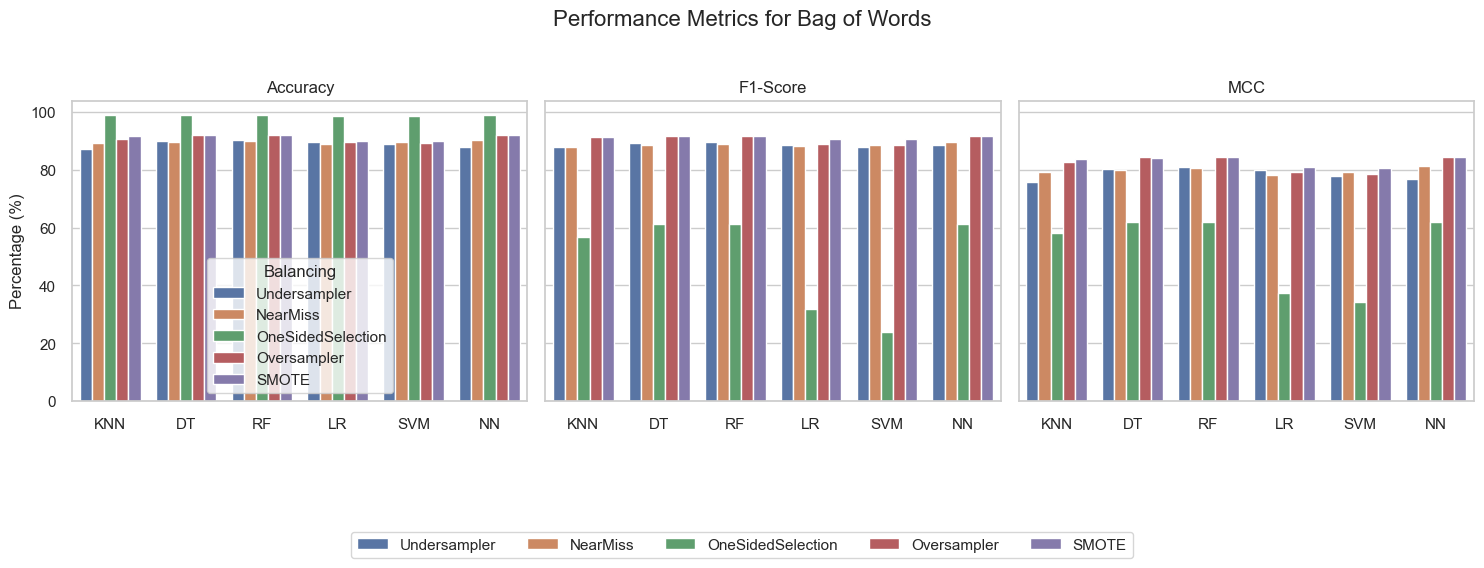

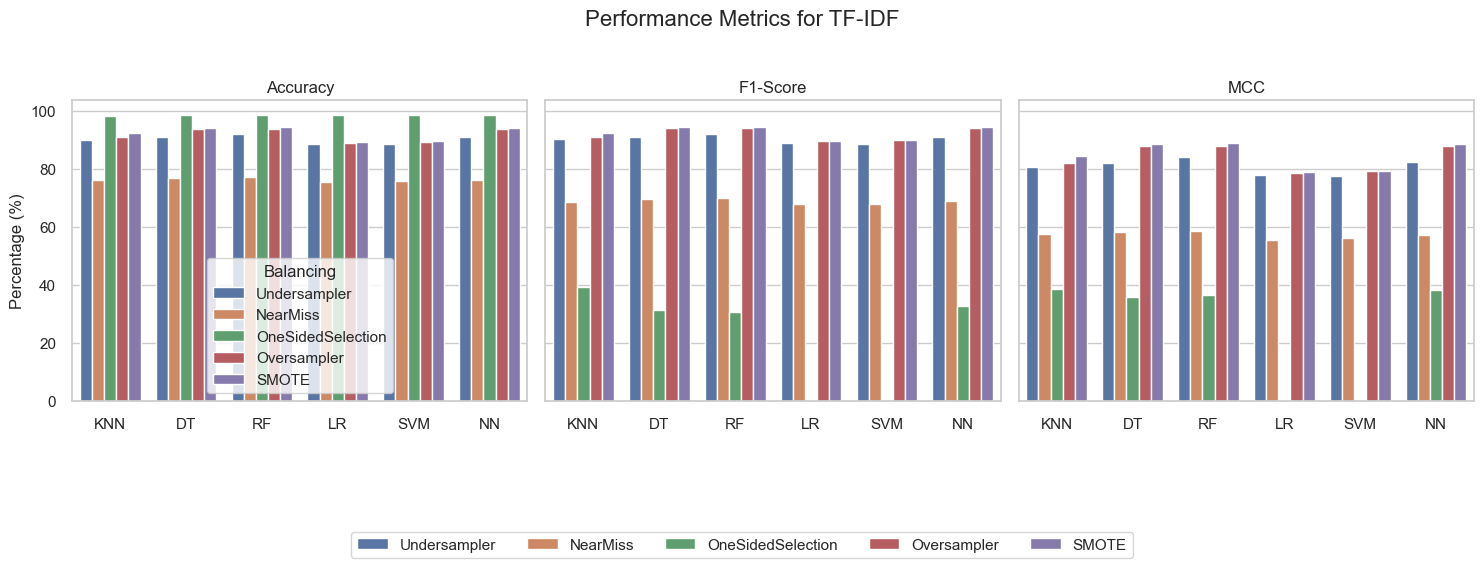

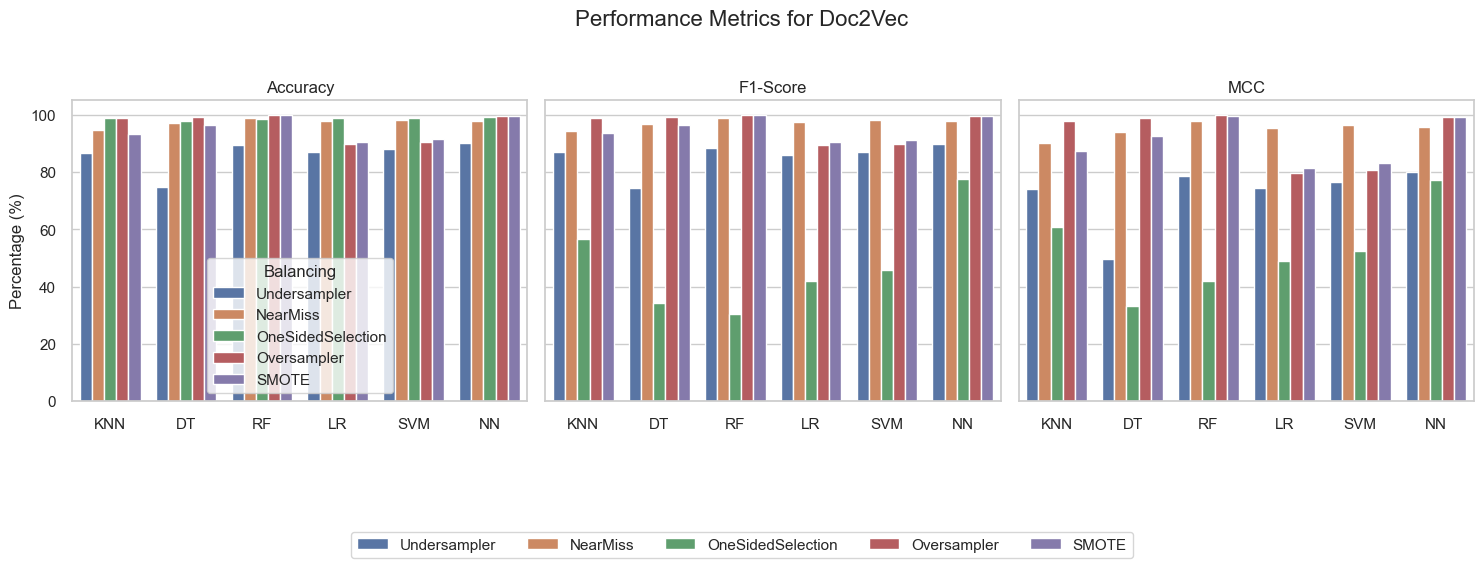

In [ ]:
# Configurações para os gráficos
sns.set(style="whitegrid")

# Obtendo técnicas de NLP e métricas únicas
nlp_techniques = data['NLP'].unique()
metrics = data['Metric'].unique()

# Configurações de layout dos gráficos
num_metrics = len(metrics)
fig_width = num_metrics * 5  # Ajuste a largura conforme necessário
fig_height = 5

# Criar os gráficos
for nlp in nlp_techniques:
    nlp_data = data[data['NLP'] == nlp]
    fig, axs = plt.subplots(1, num_metrics, figsize=(fig_width, fig_height), sharey=True)

    # Cria um gráfico para cada métrica
    for i, metric in enumerate(metrics):
        ax = axs[i]
        metric_data = nlp_data[nlp_data['Metric'] == metric]
        sns.barplot(x='ML', y='Percentage', hue='Balancing', data=metric_data, ax=ax)
        ax.set_title(metric)
        ax.set_xlabel('')
        ax.set_ylabel('Percentage (%)' if i == 0 else '')
        if i != 0:
            ax.set_ylabel('')  # Remove o eixo y dos gráficos que não são o primeiro
        if i > 0:  # Remove a legenda dos subplots, exceto o primeiro
            ax.get_legend().remove()

    # Adiciona uma única legenda fora do último subplot
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

    plt.suptitle(f'Performance Metrics for {nlp}', fontsize=16)
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Ajuste os valores aqui conforme necessário
    plt.show()

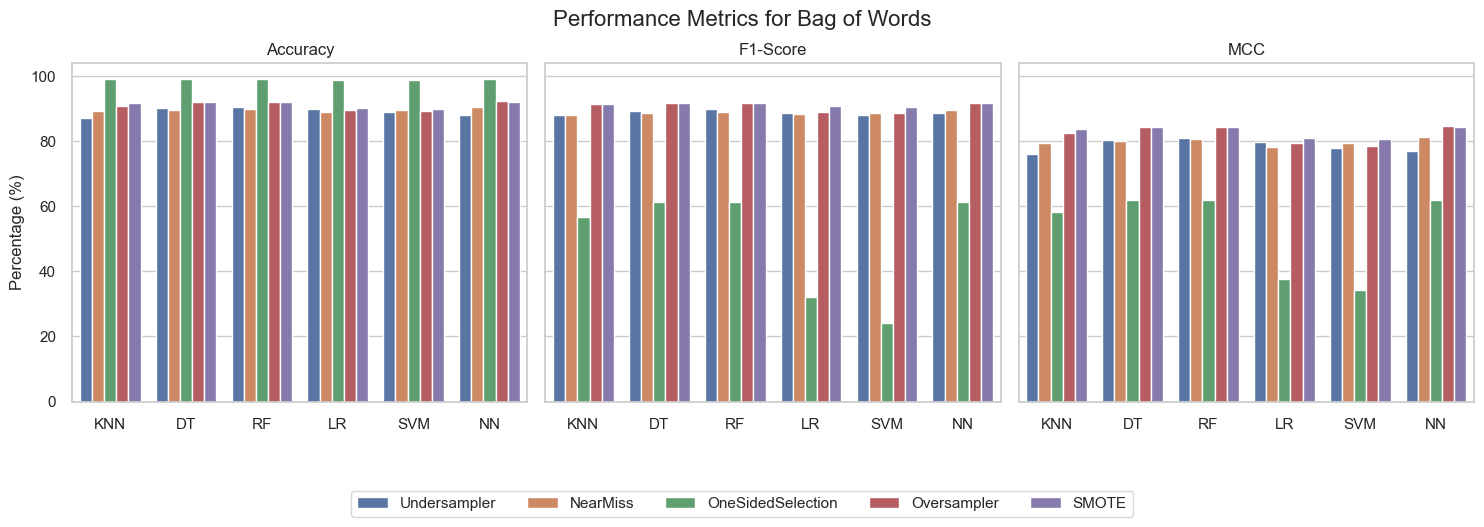

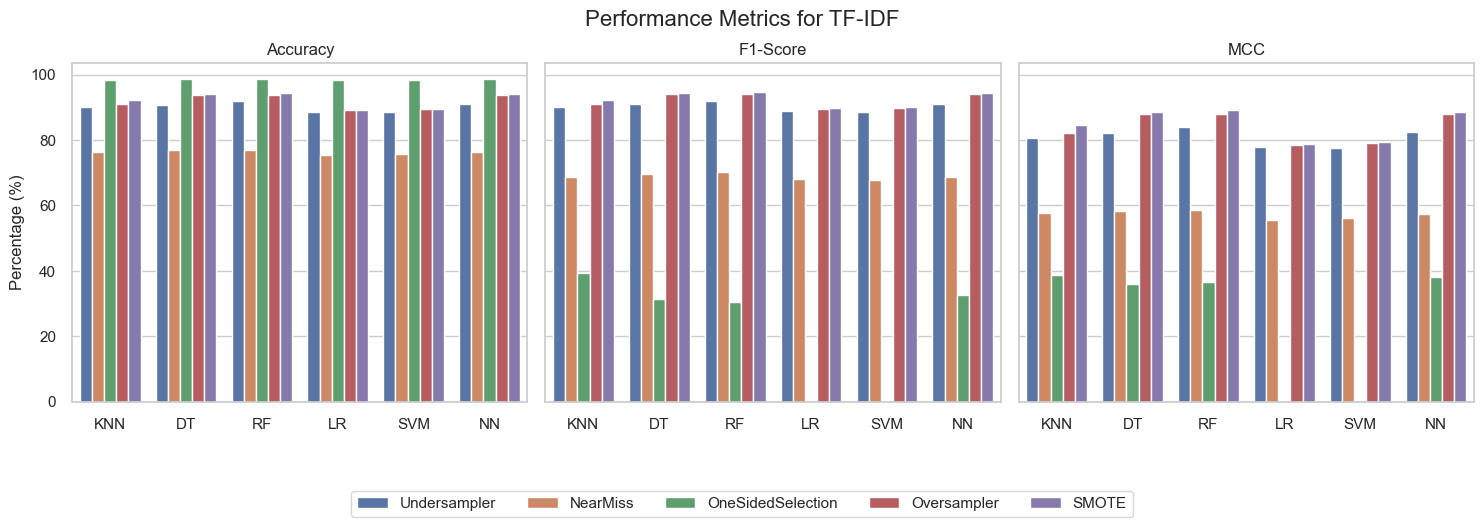

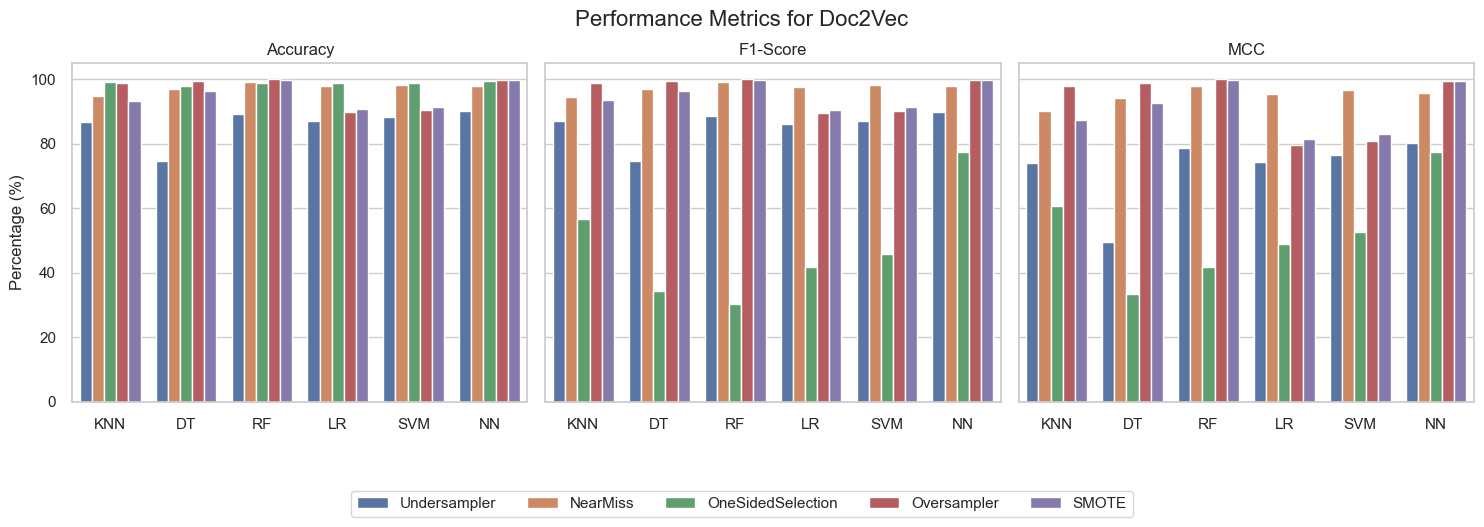

In [ ]:
# Configurações para os gráficos
sns.set(style="whitegrid")

# Obtendo técnicas de NLP e métricas únicas
nlp_techniques = data['NLP'].unique()
metrics = data['Metric'].unique()

# Criar a figura com base no número de métricas
fig_width = len(metrics) * 5  # Ajuste a largura conforme necessário
fig_height = 5

# Criar os gráficos
for nlp in nlp_techniques:
    nlp_data = data[data['NLP'] == nlp]
    fig, axs = plt.subplots(1, len(metrics), figsize=(fig_width, fig_height), sharey=True)

    # Criar um gráfico para cada métrica
    for i, metric in enumerate(metrics):
        ax = axs[i]
        metric_data = nlp_data[nlp_data['Metric'] == metric]
        sns.barplot(x='ML', y='Percentage', hue='Balancing', data=metric_data, ax=ax)
        ax.set_title(metric)
        ax.set_xlabel('')
        ax.set_ylabel('Percentage (%)' if i == 0 else '')
        
        # Remover a legenda dos subplots
        ax.get_legend().remove()

    # Adicionar uma única legenda fora do último subplot
    handles, labels = axs[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels), frameon=True)

    # Ajustar os subplots para dar espaço para a legenda
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.suptitle(f"Performance Metrics for {nlp}", fontsize=16)
    # Mostrar o gráfico
    plt.show()